In [1]:
from matplotlib import style
from nm_lib import nm_lib as nm
style.use('dark_background')
import importlib
importlib.reload(nm)

<module 'nm_lib.nm_lib' from '/Users/juanms/Numerical_sim_course/students_2023/phd/Gaute_Amesson_Holen/nm_lib/nm_lib/nm_lib.py'>

# A calculation of the order of convergence when the limit value is unknown

## _This problem is an optional extension of the previous exercise sheets_

Assume we have determined numerically an approximate value $f_{\Delta x}$ of a function (for example, of a derivative) using a numerical mesh with grid cells $\Delta x$. We say that a numerical approximation converges toward a limit value $f_{lim}$ with $m$-order approximation if we can write to leading order for all $\Delta x$ which are sufficiently small.

$$f_{\Delta x} = f_{lim} + A(\Delta x)^m  \tag{1}$$

with $A$ a constant. If the global domain in $x$ has length $L$ and has been divided into $N$ intervals (so that  $\Delta x = L/N$), then we have:

$$f_N = f_{lim} + A\left(\frac{L}{N}\right)^m  \tag{2}$$

From there it is straightforward to obtain:

$$\frac{f_{4N}-f_{2N}}{f_{2N}-f_{N}} = \frac{4^{m}-2^{m}}{2^{m}-1} = 2^{m}  \tag{3}$$

or, in other words,

$$m = \log\left(\frac{f_{4N}-f_{2N}}{f_{2N}-f_{N}}\right)/\log2  \tag{4}$$

with log the natural logarithm. Thus, if we obtain a numerical value for a function at a given point with increasing order of approximation using $N$, $2N$, and $4N$ intervals in a given domain, we can calculate the order $m$ of the approximation using Eq. (4) without having to know in advance the exact analytical limit value. Test this method with `np.deriv_cent` and `np.deriv_4tho` and fill in `nm.order_conv`.

order conv for centered -4.076622045147255
order conv for 4th order -1.9890675241957916


Text(0.5, 1.0, 'Order convergence')

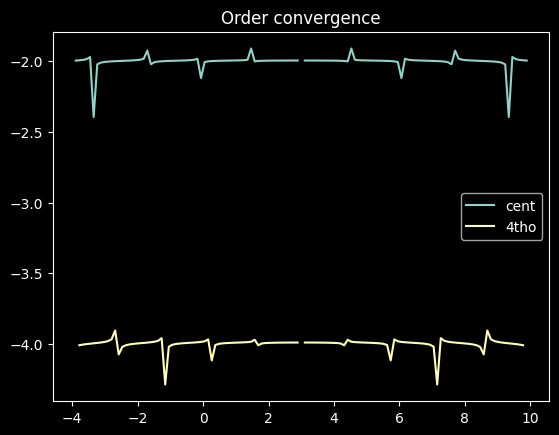

In [2]:
import numpy as np
#import nm_lib as nm
import matplotlib.pyplot as plt

nump = 128
x0 = -4
xf = 10.0

"""
def h(x):
    return x**2
"""

def h(x):
    return np.cos(np.pi*(x-1)*0.5)*np.exp(-((x-3)/2.5)**2)

def ana(x):
    return np.exp(-0.16*(x-3)**2)*((0.96-0.32*x)*np.sin(np.pi*0.5*x)+1.5708*np.cos(np.pi*x*0.5))

xx = np.linspace(x0,xf,nump+1)
xx2 = np.linspace(x0,xf,2*nump+1)
xx4 = np.linspace(x0,xf,4*nump +1)

hh = h(xx)
hh2 = h(xx2)
hh4 = h(xx4)

dhdx = nm.deriv_4tho(xx,hh)
dhdx2 = nm.deriv_4tho(xx2,hh2)
dhdx4 = nm.deriv_4tho(xx4,hh4)

m4 = nm.order_conv(dhdx,dhdx2,dhdx4)

print("order conv for centered",np.mean(m4))

dhdx = nm.deriv_cent(xx,hh)
dhdx2 = nm.deriv_cent(xx2,hh2)
dhdx4 = nm.deriv_cent(xx4,hh4)

m2 = nm.order_conv(dhdx,dhdx2,dhdx4)

print("order conv for 4th order",np.mean(m2))

plt.plot(xx[1:-1],m2[1:-1],label="cent")
plt.plot(xx[2:-2],m4[2:-2],label="4tho")
plt.legend()
plt.title("Order convergence")



In the above plot we see that the centered difference converges to 2nd order as expected. The 4th order converges to the 4th order, also as expected.

In [8]:
"""
dhdx4tho = nm.deriv_4tho(xx,hh)
dhdx_cent = nm.deriv_dnw(xx,hh)
anader = ana(xx)

plt.plot(xx,dhdx4tho)
plt.plot(xx,anader)

plt.figure()
plt.plot(xx[-5:],dhdx4tho[-5:])
plt.plot(xx[-5:],anader[-5:])

plt.figure()
plt.plot(xx,hh)
plt.figure()
err = [np.abs(x-an) for x,an in zip(dhdx4tho,anader)]
plt.plot(xx[2:-2],err[2:-2])
"""

'\ndhdx4tho = nm.deriv_4tho(xx,hh)\ndhdx_cent = nm.deriv_dnw(xx,hh)\nanader = ana(xx)\n\nplt.plot(xx,dhdx4tho)\nplt.plot(xx,anader)\n\nplt.figure()\nplt.plot(xx[-5:],dhdx4tho[-5:])\nplt.plot(xx[-5:],anader[-5:])\n\nplt.figure()\nplt.plot(xx,hh)\nplt.figure()\nerr = [np.abs(x-an) for x,an in zip(dhdx4tho,anader)]\nplt.plot(xx[2:-2],err[2:-2])\n'

<span style="color:green">JMS</span>.

<span style="color:blue">Great job </span>.

<span style="color:orange">To be able to run the code I had to change to `from nm_lib import nm_lib as nm` </span>.